In [49]:
from matplotlib import pyplot as plt
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [50]:
trans = transforms.ToTensor()
# 下载并加载训练集
mnist_train = torchvision.datasets.FashionMNIST(r'..\data\F_MNIST_data_train', download=True, train=True,transform=trans) 
# 下载并加载测试集
mnist_test = torchvision.datasets.FashionMNIST(r'..\data\F_MNIST_data_test', download=True, train=False,transform=trans)

len(mnist_train),len(mnist_test)

(60000, 10000)

展示数据集的模样

In [51]:
mnist_train[0][0].shape,mnist_train[0][1]

(torch.Size([1, 28, 28]), 9)

因为数据集中的标签值是数字，要把数字和文本标签对应起来

In [52]:
def get_fashion_mnist_labels(labels):
    '''返回fashionmnist数据集中的文本标签'''
    text_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    return [text_labels[int(i)] for i in labels]

显示图片

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """显示图片"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)#创建一个row行，col列的子图的图形对象。返回两个值，一个是Figure对象，由于不用所以用‘_’来接收，Axes对象，用axes接收
    axes = axes.flatten()#展平为一维数组方便后续遍历
    for i, (ax, img) in enumerate(zip(axes, imgs)):#zip(axes, imgs) 将展平后的子图对象 axes 和图片数据 imgs 一一对应地组合起来，enumerate 为这个组合后的可迭代对象添加索引
        ax.imshow(img.numpy(), cmap='gray')  # 确保使用 .numpy() 方法并添加灰度色彩映射
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    plt.show()

展示一批18个

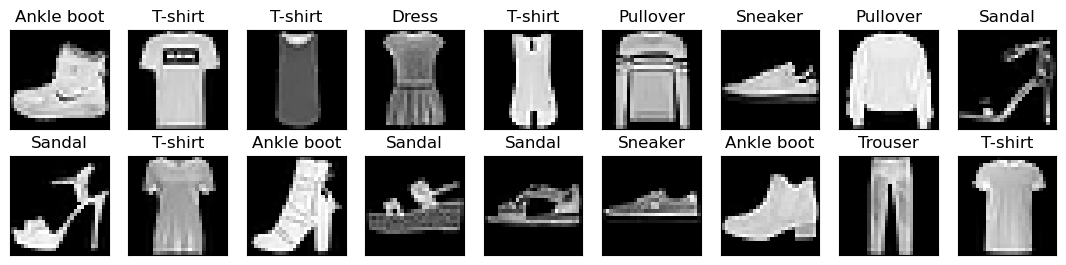

In [54]:
X,y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

记录一下读取一个批次的数据需要的时间

In [55]:
batch_size = 256

def get_dataloader_workers():
    '''用四个进程读取数据'''
    return 4

train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

import timeit

def test_function():
    for X,y in train_iter:
        continue

executive_time = timeit.timeit(test_function,number=1)
print(f'Execution time:{executive_time:.2f}s')

Execution time:7.72s


将下载数据集，加载数据集的功能打包起来，直接得到训练和测试用的加载器

In [56]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集,然后将其加载到内存中。"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)

    mnist_train = torchvision.datasets.FashionMNIST(root=r'..\data\F_MNIST_data_train', train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root=r'..\data\F_MNIST_data_test', train=False, transform=trans, download=True)

    return (
        data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
        data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=get_dataloader_workers())
    )